# Laptop Price Predictor

### Life cycle of a Machine Learning Project

- Understanding the Problem statement
- Data Collection
- Data Checks to perform 
- Exploratory data analysis
- Data pre-processing
- Model Training
- Choose best Model

### 1) Problem Statement: Laptop Price Prediction

- The goal of this project is to develop a machine learning model that can predicts the price of a laptop based on various features such as its technical specifications, brand, and other relevant attributes.

##### Business Objective:
- With the rapid growth of e-commerce and online marketplaces, it is essential for sellers to understand how different laptop features affect their prices. This model will help sellers, manufacturers, and customers alike to estimate laptop prices and make informed buying or selling decisions.

### 2) Data collection: 
- Downloaded the dataset from the internet

### 2.1 Importing the data and required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### importing the csv data as pandas dataframe

In [8]:
df = pd.read_csv('data/laptop_data.csv')

In [9]:
df.drop(columns=['Unnamed: 0'],inplace=True)

- top  records

In [10]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


- shape of the dataset


In [11]:
df.shape

(1303, 11)

### 2.2 Dataset information

- 1.Company : it the company name of the laptop manufacturer
- 2.TypeName : Laptop type
- 3.Inches : Size of the laptop in inches
- 4.ScreenResolution : Resolution of the screen with screen type
- 5.CPU : Central processing unit of the laptop
- 6.RAM : Random access memory of the laptops in gb
- 7.Memory : Read only memory of the laptop in gb
- 8.GPU : Graphical processing unit of the laptop
- 9.opSys: operating system of the laptop
- 10.weight: weight of laptop in kg
- 11.price: price of the laptop in inr

### 3. Data checks to perform

- Check missing values
- Check Duplicates
- Check data type
- Check the number of unique values in each column
- Check the statistics of the dataset and Explore/clean each feature


### 3.1 Check missing values

In [12]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [13]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

- there are no missing or nan values in the dataset

### 3.2 Check the Duplicates

In [28]:
df.duplicated().sum()

np.int64(29)

- it has 29 duplicate records

In [26]:
df_grouped = df.groupby(list(df.columns)).size().reset_index(name='counts')
df_grouped[df_grouped['counts'] > 2]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,counts
43,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,15397.9200,3
210,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.3200,4
221,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496,3
258,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,38841.1200,3
365,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,20193.1200,3
384,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,24455.5200,3
406,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,42943.1472,3
604,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200,3
697,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,3
708,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672,3


- Dropping the duplictes and retaining the first record

In [29]:
df_cleaned = df.drop_duplicates(keep='first')

In [32]:
df_cleaned.shape

(1274, 11)

In [33]:
df_cleaned.duplicated().sum()

np.int64(0)

- now the dataset has no duplicate records

### 3.3 Check Data type

In [35]:
df_cleaned.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [34]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   object 
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   object 
 10  Price             1274 non-null   float64
dtypes: float64(2), object(9)
memory usage: 119.4+ KB


- we can have ram column as int and weight col as float

In [38]:
df_cleaned['Ram'] = df_cleaned['Ram'].str.replace("GB"," ")
df_cleaned['Ram'] = df_cleaned['Ram'].astype('int32')
df_cleaned['Weight'] = df_cleaned['Weight'].str.replace("kg"," ")
df_cleaned['Weight'] = df_cleaned['Weight'].astype('float32')

In [39]:
df_cleaned.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


In [40]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 109.5+ KB


### 3.4 Check number of unique values

In [44]:
cat_cols = df_cleaned.select_dtypes(include=object)
for col in cat_cols.columns:
    print(f"{col} -- >{cat_cols[col].nunique()}")


Company -- >19
TypeName -- >6
ScreenResolution -- >40
Cpu -- >118
Memory -- >39
Gpu -- >110
OpSys -- >9


### 3.5 Check the statistics of the dataset and Explore/clean each feature

#### 3.5.1 basic stats

In [45]:
df_cleaned.describe()

,Inches,Ram,Weight,Price
count,1274.000000,1274.000000,1274.000000,1274.000000
mean,15.022449,8.444270,2.040401,60503.185074
std,1.429940,5.098291,0.669444,37333.222977
min,10.100000,2.000000,0.690000,9270.720000
25%,14.000000,4.000000,1.500000,32495.605200
50%,15.600000,8.000000,2.040000,52693.920000
75%,15.600000,8.000000,2.310000,79773.480000
max,18.400000,64.000000,4.700000,324954.720000


##### observations
- Ram might be containing some outliers has there is large difference in 75% and max value.
- Price column also might have some outliers as there is large difference in 75% and max value.


##### 3.5.2 feature analysis

##### Price

<Axes: xlabel='Price', ylabel='Density'>

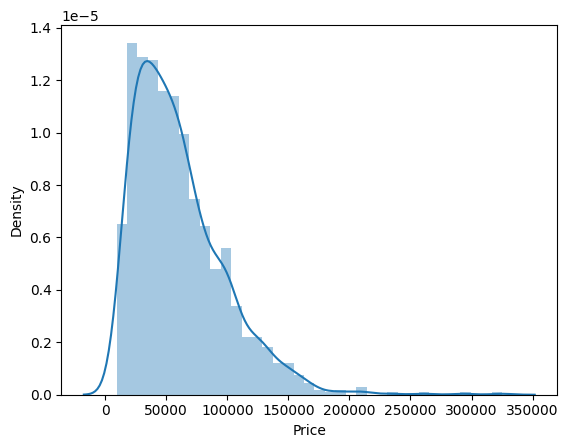

In [66]:
sns.distplot(df_cleaned['Price'])

- There are more laptops with small price and only some laptops with high prices.
- It is right skewed

##### Compnay

<Axes: ylabel='Company'>

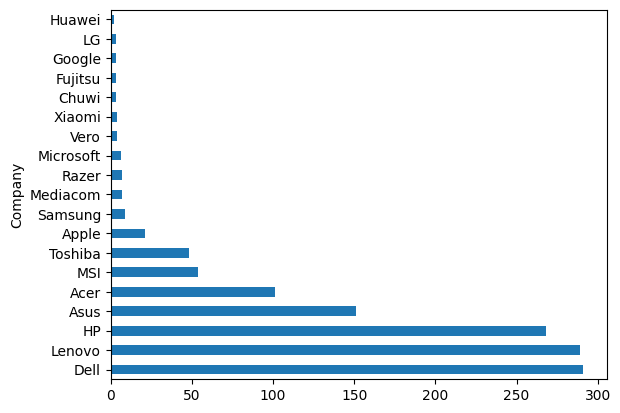

In [60]:
df_cleaned['Company'].value_counts().plot(kind='barh')

- we can see more laptops from companies like Dell,Lenovo,HP,Asus and Acer.

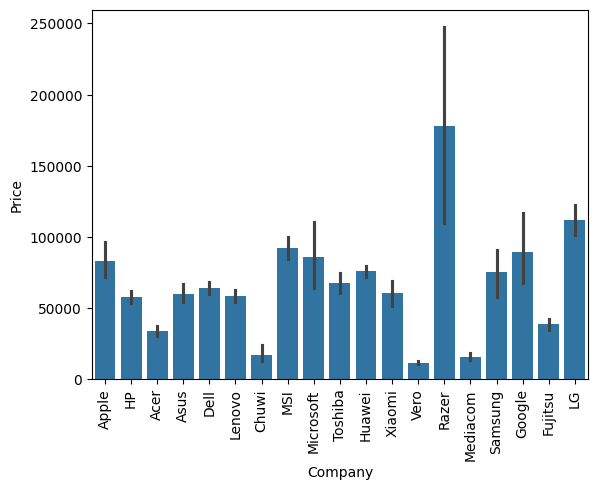

In [57]:
sns.barplot(data=df_cleaned,x='Company',y='Price')
plt.xticks(rotation = 'vertical')
plt.show()

- Except Razer, all other company laptops have there price max around 1Lakh.

##### TypeName

<Axes: ylabel='TypeName'>

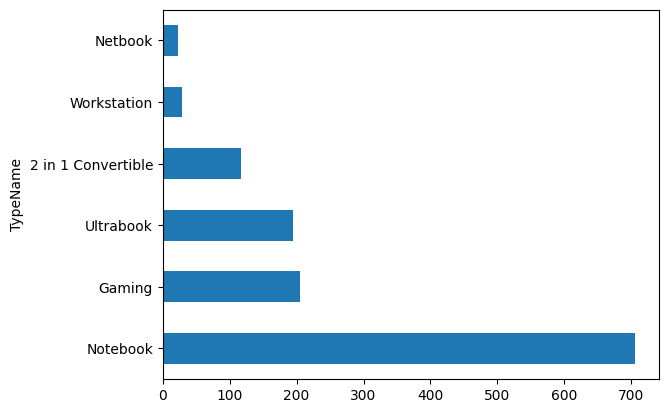

In [61]:
df_cleaned['TypeName'].value_counts().plot(kind='barh')

- large number of laptops are of type notebook

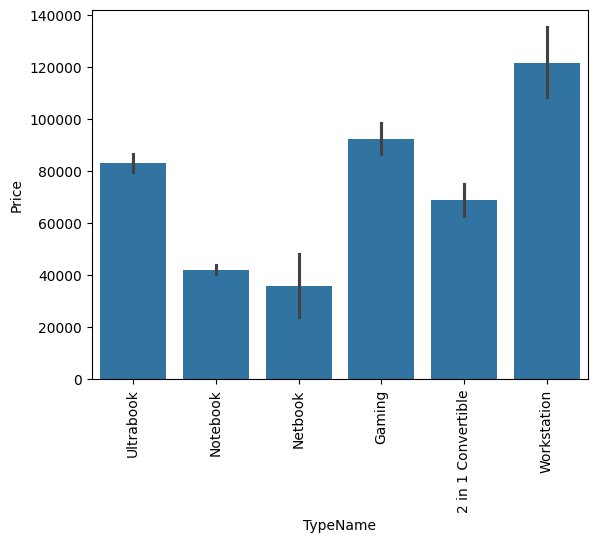

In [62]:
sns.barplot(data=df_cleaned,x='TypeName',y='Price')
plt.xticks(rotation = 'vertical')
plt.show()

##### Screen resolution

<Axes: xlabel='Inches', ylabel='Density'>

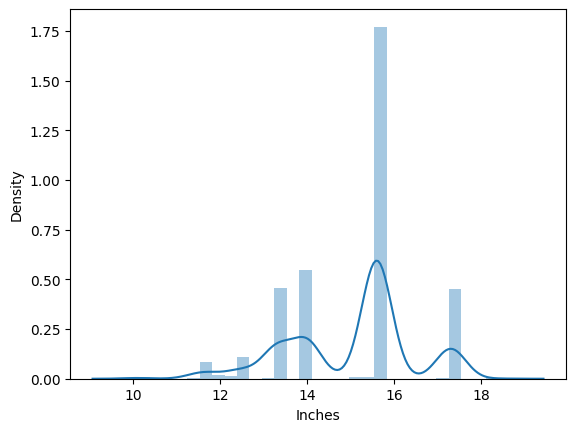

In [65]:
sns.distplot(df_cleaned['Inches'])

#### ScreenResolution

In [68]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

This column contains information after multiple features of the laptop like
- Touch screen
- Full HD and Ultra HD which can become one feature
- IPS Panel Retina Display and IPS Quad HD+ which can become one feature
- Resolution


In [71]:
## extracting the Touch feature

df_cleaned['Touchscreen'] = df_cleaned['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

<Axes: ylabel='Touchscreen'>

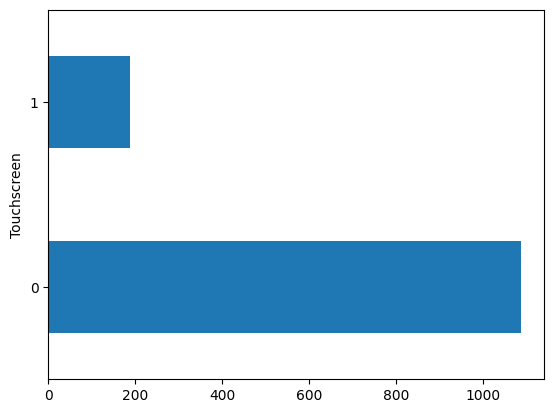

In [74]:
df_cleaned['Touchscreen'].value_counts().plot(kind='barh')

- we have less touch screen laptops then the normal laptops

In [79]:
df_cleaned['IPS_screen'] = df_cleaned['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

<Axes: ylabel='IPS_screen'>

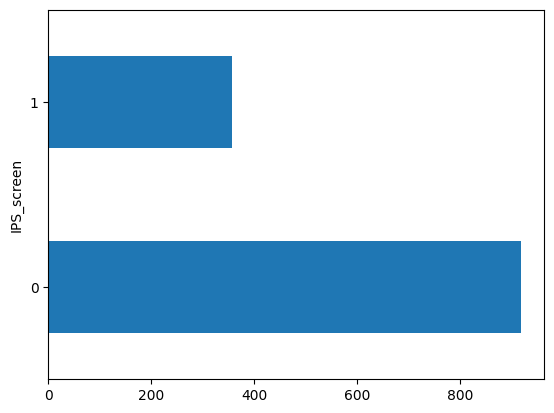

In [81]:
df_cleaned['IPS_screen'].value_counts().plot(kind='barh')

##### extracting the resolution from the ScreenResolution column

In [88]:
new = df_cleaned['ScreenResolution'].str.split('x',n=1,expand=True)
df_cleaned['Y_res'] = new[1]
df_cleaned['X_res'] = new[0]

In [89]:
df_cleaned.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_screen,Y_res,X_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,1600,IPS Panel Retina Display 2560
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,900,1440
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1080,Full HD 1920


In [91]:
#using regexp to extract the X_res
df_cleaned['X_res'] = df_cleaned['X_res'].str.replace(","," ").str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [93]:
df_cleaned['Y_res'] = df_cleaned['Y_res'].astype('int32')
df_cleaned['X_res'] = df_cleaned['X_res'].astype('int32')

In [96]:
df_cleaned.select_dtypes(exclude=object).corr()['Price']

Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
Touchscreen    0.188631
IPS_screen     0.250358
Y_res          0.548111
X_res          0.552074
Name: Price, dtype: float64

##### we will be creating the new feature Pixel per inch using x_res,y_res and inches

In [97]:

df_cleaned['PPI']  = (((df_cleaned['X_res'] **2) + (df_cleaned['X_res'] **2))**0.5/df_cleaned['Inches']).astype('float')

In [98]:
df_cleaned.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_screen,Y_res,X_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,1600,2560,272.209528
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,900,1440,153.117859
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1080,1920,174.057054
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,1800,2880,264.476303
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,1600,2560,272.209528


#### droppping the unnecessary columns

In [99]:
df_cleaned.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Touchscreen',
       'IPS_screen', 'Y_res', 'X_res', 'PPI'],
      dtype='object')

In [100]:
df_cleaned.drop(columns=['ScreenResolution','Y_res', 'X_res'],inplace=True)

##### CPU

In [103]:
df_cleaned['CPU_Name'] = df_cleaned['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [104]:
df_cleaned.head(3)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_screen,PPI,CPU_Name
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,272.209528,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,153.117859,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,174.057054,Intel Core i5


In [105]:
def fetch_processor(text):
    if text == "Intel Core i7" or text == "Intel Core i5" or text == "Intel Core i3":
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [107]:
df_cleaned['CPU_Brand'] = df_cleaned['CPU_Name'].apply(fetch_processor)

<Axes: ylabel='CPU_Brand'>

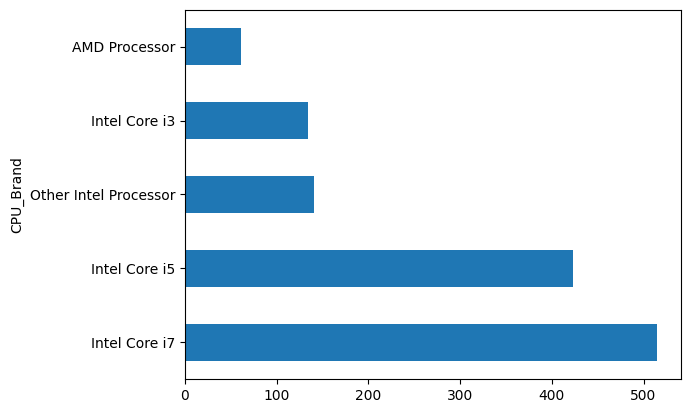

In [108]:
df_cleaned['CPU_Brand'].value_counts().plot(kind='barh')

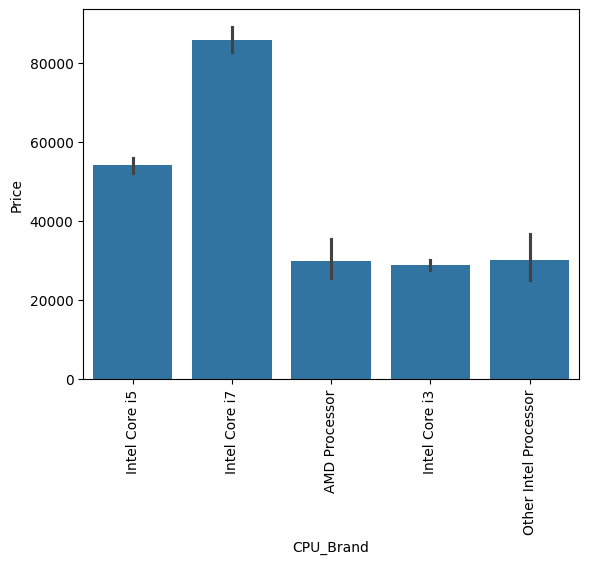

In [111]:
sns.barplot(data=df_cleaned,x=df_cleaned['CPU_Brand'],y=df_cleaned['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

#### RAM

<Axes: xlabel='Ram'>

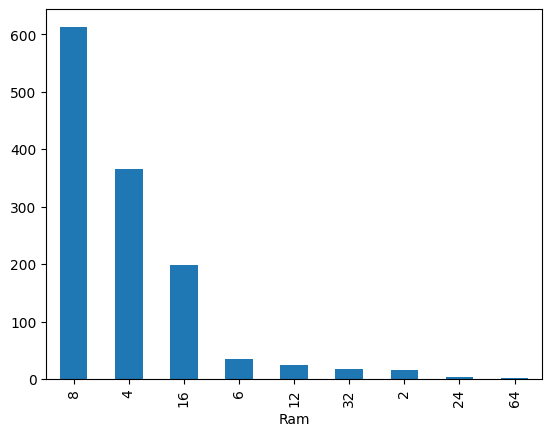

In [115]:
df_cleaned['Ram'].value_counts().plot(kind='bar')

- most of the laptops are having 8 gb ram


<Axes: xlabel='Ram', ylabel='Price'>

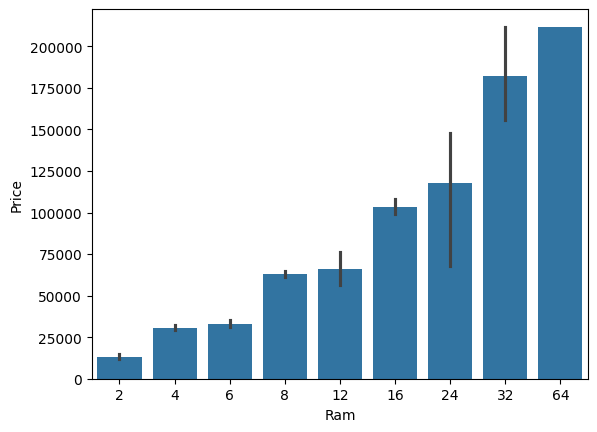

In [114]:
sns.barplot(data=df_cleaned,x=df_cleaned['Ram'],y=df_cleaned['Price'])

- Price and Ram are linear related

##### Memory

- From memory we are constructing four more features like SSD, HDD , Hybrid and FlashStorage

In [135]:
# removing the decimal part in memory text and replacing the TB as 1000 and GB with balnk space
df_cleaned['Memory'] = df_cleaned['Memory'].astype(str).replace('\.0', '', regex=True)
df_cleaned["Memory"] = df_cleaned["Memory"].str.replace('GB', '')
df_cleaned["Memory"] = df_cleaned["Memory"].str.replace('TB', '000')
new = df_cleaned["Memory"].str.split("+", n = 1, expand = True)
df_cleaned["first"]= new[0]
df_cleaned["first"]=df_cleaned["first"].str.strip()

df_cleaned["second"]= new[1]

In [119]:
df_cleaned.head(3)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_screen,PPI,CPU_Name,CPU_Brand,first,second
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,272.209528,Intel Core i5,Intel Core i5,128 SSD,None
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,153.117859,Intel Core i5,Intel Core i5,128 Flash Storage,None
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,174.057054,Intel Core i5,Intel Core i5,256 SSD,None


In [136]:
#separting the Storage types for feature creation
df_cleaned["Layer1HDD"] = df_cleaned["first"].apply(lambda x: 1 if "HDD" in x else 0)
df_cleaned["Layer1SSD"] = df_cleaned["first"].apply(lambda x: 1 if "SSD" in x else 0)
df_cleaned["Layer1Hybrid"] = df_cleaned["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df_cleaned["Layer1Flash_Storage"] = df_cleaned["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df_cleaned['first'] = df_cleaned['first'].str.extract('(\d+)')

df_cleaned["second"].fillna("0", inplace = True)

df_cleaned["Layer2HDD"] = df_cleaned["second"].apply(lambda x: 1 if "HDD" in x else 0)
df_cleaned["Layer2SSD"] = df_cleaned["second"].apply(lambda x: 1 if "SSD" in x else 0)
df_cleaned["Layer2Hybrid"] = df_cleaned["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df_cleaned["Layer2Flash_Storage"] = df_cleaned["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df_cleaned['second'] = df_cleaned['second'].str.extract('(\d+)')


In [137]:
df_cleaned["first"] = df_cleaned["first"].astype('int16')
df_cleaned["second"] = df_cleaned["second"].astype('int16')

In [140]:
df_cleaned["HDD"]=(df_cleaned["first"]*df_cleaned["Layer1HDD"]+df_cleaned["second"]*df_cleaned["Layer2HDD"])
df_cleaned["SSD"]=(df_cleaned["first"]*df_cleaned["Layer1SSD"]+df_cleaned["second"]*df_cleaned["Layer2SSD"])
df_cleaned["Hybrid"]=(df_cleaned["first"]*df_cleaned["Layer1Hybrid"]+df_cleaned["second"]*df_cleaned["Layer2Hybrid"])
df_cleaned["Flash_Storage"]=(df_cleaned["first"]*df_cleaned["Layer1Flash_Storage"]+df_cleaned["second"]*df_cleaned["Layer2Flash_Storage"])

In [141]:
df_cleaned.head(3)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,...,0,1,0,0,0,0,0,0,0,128
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,...,0,0,0,0,0,0,0,256,0,0


In [131]:
df_cleaned.columns

Index(['Company', 'TypeName', 'Inches', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys',
       'Weight', 'Price', 'Touchscreen', 'IPS_screen', 'PPI', 'CPU_Name',
       'CPU_Brand', 'first', 'second', 'Layer1HDD', 'Layer1SSD',
       'Layer1Hybrid', 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD',
       'Layer2Hybrid', 'Layer2Flash_Storage'],
      dtype='object')

In [142]:
df_cleaned.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [143]:
df_cleaned.head(3)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_screen,PPI,CPU_Name,CPU_Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,272.209528,Intel Core i5,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,153.117859,Intel Core i5,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,174.057054,Intel Core i5,Intel Core i5,0,256,0,0


In [144]:
df_cleaned.drop(columns=['Memory'],inplace=True)

In [146]:
df_cleaned.columns

Index(['Company', 'TypeName', 'Inches', 'Cpu', 'Ram', 'Gpu', 'OpSys', 'Weight',
       'Price', 'Touchscreen', 'IPS_screen', 'PPI', 'CPU_Name', 'CPU_Brand',
       'HDD', 'SSD', 'Hybrid', 'Flash_Storage'],
      dtype='object')

In [151]:
df_cleaned.drop(columns=['Inches','Cpu','CPU_Name','Hybrid','Flash_Storage'],inplace=True)

In [152]:
df_cleaned.select_dtypes(exclude=object).corr()['Price']

Ram            0.740106
Weight         0.212192
Price          1.000000
Touchscreen    0.188631
IPS_screen     0.250358
PPI            0.471115
HDD           -0.098011
SSD            0.669957
Name: Price, dtype: float64

In [155]:
df_cleaned.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS_screen,PPI,CPU_Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,272.209528,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,153.117859,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,174.057054,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,264.476303,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,272.209528,Intel Core i5,0,256


##### GPU

In [156]:
df_cleaned[['Gpu']].value_counts()

Gpu                    
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia GeForce GTX1080       1
Nvidia Quadro 3000M          1
Nvidia Quadro M3000M         1
Nvidia Quadro M500M          1
Nvidia Quadro M620M          1
Name: count, Length: 110, dtype: int64

In [159]:
df_cleaned['Gpu'] = df_cleaned['Gpu'].apply(lambda x:x.split()[0])

In [160]:
df_cleaned['Gpu'].value_counts()

Gpu
Intel     703
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [163]:
df_cleaned = df_cleaned[df_cleaned['Gpu'] !='ARM']

In [164]:
df_cleaned['Gpu'].value_counts()

Gpu
Intel     703
Nvidia    396
AMD       174
Name: count, dtype: int64

<Axes: xlabel='Gpu', ylabel='Price'>

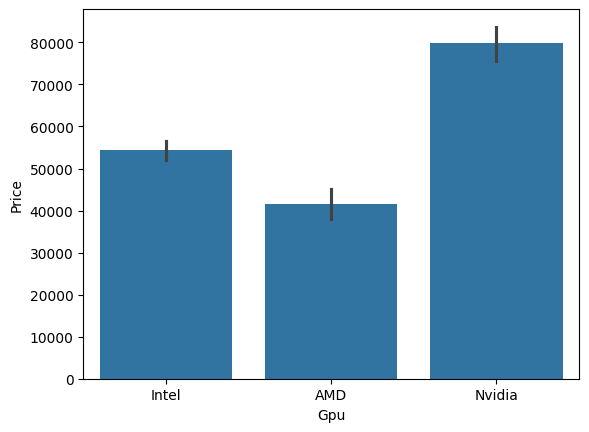

In [165]:
sns.barplot(data=df_cleaned,x=df_cleaned['Gpu'],y=df_cleaned['Price'])

##### OpsSys

In [166]:
df_cleaned['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [167]:
def cat_os(text):
    if text == 'Windows 10' or text == 'Windows 7' or text == "Windows 10 S":
        return "windows"
    elif text == "macOS" or text == "Mac OS X":
        return 'Mac'
    else:
        return 'Others/No OS/Linux'


In [168]:
df_cleaned['OS'] = df_cleaned['OpSys'].apply(cat_os)

In [169]:
df_cleaned['OS'].value_counts()

OS
windows               1100
Others/No OS/Linux     152
Mac                     21
Name: count, dtype: int64

In [171]:
df_cleaned.drop(columns=['OpSys'],inplace=True)

<Axes: xlabel='OS', ylabel='Price'>

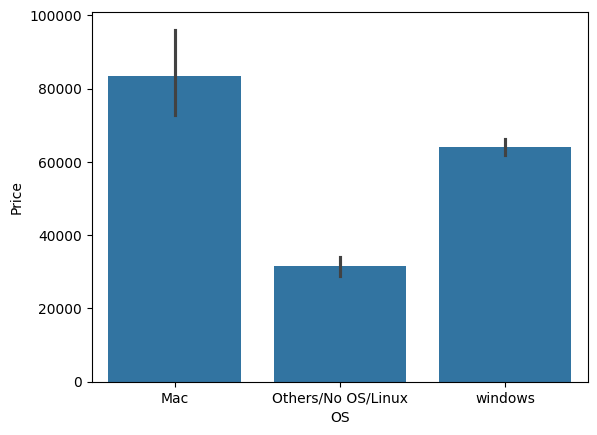

In [172]:
sns.barplot(data=df_cleaned,x=df_cleaned['OS'],y=df_cleaned['Price'])

##### Weight

<Axes: xlabel='Weight', ylabel='Price'>

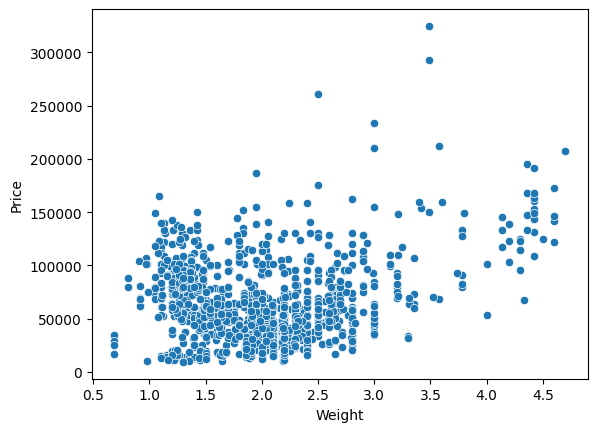

In [173]:
sns.scatterplot(data=df_cleaned,x=df_cleaned['Weight'],y=df_cleaned['Price'])

In [174]:
df_cleaned.head()

,Company,TypeName,Ram,Gpu,Weight,Price,Touchscreen,IPS_screen,PPI,CPU_Brand,HDD,SSD,OS
0,Apple,Ultrabook,8,Intel,1.37,71378.6832,0,1,272.209528,Intel Core i5,0,128,Mac
1,Apple,Ultrabook,8,Intel,1.34,47895.5232,0,0,153.117859,Intel Core i5,0,0,Mac
2,HP,Notebook,8,Intel,1.86,30636.0000,0,0,174.057054,Intel Core i5,0,256,Others/No OS/Linux
3,Apple,Ultrabook,16,AMD,1.83,135195.3360,0,1,264.476303,Intel Core i7,0,512,Mac
4,Apple,Ultrabook,8,Intel,1.37,96095.8080,0,1,272.209528,Intel Core i5,0,256,Mac


## Saving the cleaned data

In [175]:
df_cleaned.to_csv('data/cleaned_data.csv',index=False)